# Ejercicio 13 - Capitulo 4

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Ejercicio A
Weekly = pd.read_csv('Weekly.csv')

#sns.pairplot(Weekly, hue="Direction", diag_kind="kde")
#plt.suptitle("Correlaciones")
#plt.show()


In [ ]:
#' Descripciones
print(Weekly.describe())
print(Weekly.corr())

In [ ]:
#' Ejercicio B
X = Weekly[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = Weekly['Direction']
reg_log = LogisticRegression(solver='liblinear')
reg_log.fit(X, y)
print(reg_log.coef_)

log_probs = reg_log.predict_proba(X)[:, 1]
log_pred = ['Down' if prob > 0.5 else 'Up' for prob in log_probs]

[[-0.04117292  0.05846974 -0.01599122 -0.02769998 -0.01440289 -0.02212844]]


In [ ]:
#' Ejercicio C
conf_matrix = confusion_matrix(log_pred, y)
accuracy = accuracy_score(log_pred, y)
print(conf_matrix)
print(accuracy)

[[429 558]
 [ 55  47]]
0.43709825528007346


In [ ]:
#' Ejercicio D
train_mask = Weekly['Year'] < 2009
X_train = X[train_mask]
y_train = y[train_mask]
X_test = X[~train_mask]
y_test = y[~train_mask]
logistic = LogisticRegression(solver='liblinear')
logistic.fit(X_train[['Lag2']], y_train)
log_pred_2009 = logistic.predict(X_test[['Lag2']])
conf_matrix_2009 = confusion_matrix(log_pred_2009, y_test)
accuracy_2009 = accuracy_score(log_pred_2009, y_test)
print(conf_matrix_2009)
print(accuracy_2009)

[[ 9  5]
 [34 56]]
0.625


In [ ]:
#' Ejercicio E
lda = LinearDiscriminantAnalysis()
lda.fit(X_train[['Lag2']], y_train)
lda_pred_2009 = lda.predict(X_test[['Lag2']])
conf_matrix_lda = confusion_matrix(lda_pred_2009, y_test)
accuracy_lda = accuracy_score(lda_pred_2009, y_test)
print(conf_matrix_lda)
print(accuracy_lda)

[[ 9  5]
 [34 56]]
0.625


In [ ]:
#' Ejercicio F
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train[['Lag2']], y_train)
qda_pred_2009 = qda.predict(X_test[['Lag2']])
conf_matrix_qda = confusion_matrix(qda_pred_2009, y_test)
accuracy_qda = accuracy_score(qda_pred_2009, y_test)
print(conf_matrix_qda)
print(accuracy_qda)

[[ 0  0]
 [43 61]]
0.5865384615384616


In [ ]:
#' Ejercicio G
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train[['Lag2']], y_train)
knn_pred_2009 = knn.predict(X_test[['Lag2']])
conf_matrix_knn = confusion_matrix(knn_pred_2009, y_test)
accuracy_knn = accuracy_score(knn_pred_2009, y_test)
print(conf_matrix_knn)
print(accuracy_knn)

[[22 32]
 [21 29]]
0.49038461538461536


In [ ]:
#' Ejercicio H: Naive Bayes
nb = GaussianNB()
nb.fit(X_train[['Lag2']], y_train)
nb_pred_2009 = nb.predict(X_test[['Lag2']])
conf_matrix_nb = confusion_matrix(nb_pred_2009, y_test)
accuracy_nb = accuracy_score(nb_pred_2009, y_test)
print(conf_matrix_nb)
print(accuracy_nb)

[[ 0  0]
 [43 61]]
0.5865384615384616


In [ ]:
# Ejercicio I: Variación de LDA
lda_variation = LinearDiscriminantAnalysis()
lda_variation.fit(X_train[['Lag1', 'Lag2', 'Lag3']], y_train)
lda_pred_var = lda_variation.predict(X_test[['Lag1', 'Lag2', 'Lag3']])
conf_matrix_lda_var = confusion_matrix(lda_pred_var, y_test)
accuracy_lda_var = accuracy_score(lda_pred_var, y_test)
print(conf_matrix_lda_var)
print(accuracy_lda_var)


[[ 8  9]
 [35 52]]
0.5769230769230769


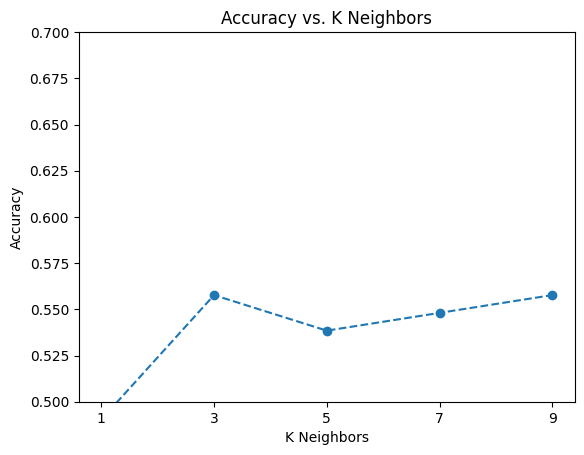

In [ ]:
# Variación de KNN
k_values = list(range(1, 11, 2))
knn_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train[['Lag2']], y_train)
    knn_pred = knn.predict(X_test[['Lag2']])
    knn_acc = accuracy_score(knn_pred, y_test)
    knn_accuracies.append(knn_acc)

plt.plot(k_values, knn_accuracies, linestyle='dashed', marker='o')
plt.xlabel('K Neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K Neighbors')
plt.xticks(np.arange(1, 11, step=2))
plt.ylim(0.5, 0.7)
plt.show()

In [ ]:
#' Variación de QDA
X_train[['Raiz']] = np.sqrt(abs(X_train[["Lag2"]]))
X_test[['Raiz']] = np.sqrt(abs(X_test[["Lag2"]]))
qda_variation = QuadraticDiscriminantAnalysis()
qda_variation.fit(X_train[['Lag2', 'Raiz']], y_train)
qda_pred_var = qda_variation.predict(X_test[['Lag2', "Raiz"]])
conf_matrix_qda_var = confusion_matrix(qda_pred_var, y_test)
accuracy_qda_var = accuracy_score(qda_pred_var, y_test)



In [ ]:
#' Resultados
print(conf_matrix_qda_var)
print(accuracy_qda_var)

[[12 13]
 [31 48]]
0.5769230769230769


In [ ]:
#' Variation of Naive Bayes
nb_variation = GaussianNB()
nb_variation.fit(X_train[['Lag1', 'Lag2', 'Lag3']], y_train)
nb_pred_var = nb_variation.predict(X_test[['Lag1', 'Lag2', 'Lag3']])
conf_matrix_nb_var = confusion_matrix(nb_pred_var, y_test)
accuracy_nb_var = accuracy_score(nb_pred_var, y_test)
print(conf_matrix_nb_var)
print(accuracy_nb_var)

[[ 5 10]
 [38 51]]
0.5384615384615384
